In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
train_X = train.drop('label', axis=1)
train_y = train['label']

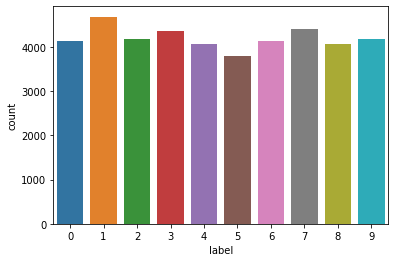

In [12]:
#train_y.value_counts()
sns.countplot(train_y)

In [13]:
#Normalise the data
train_X = train_X/255
test = test/255

In [14]:
train_X = train_X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [16]:
train_y = to_categorical(train_y, num_classes=10)

Using Theano backend.


In [19]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 1 output unit:
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
33600/33600 [==============================] - 53s 2ms/sample - loss: 0.2151 - acc: 0.9357 - val_loss: 0.0838 - val_acc: 0.9750
Epoch 2/10
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.0599 - acc: 0.9807 - val_loss: 0.0533 - val_acc: 0.9842
Epoch 3/10
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.0432 - acc: 0.9863 - val_loss: 0.0467 - val_acc: 0.9851
Epoch 4/10
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.0330 - acc: 0.9898 - val_loss: 0.0550 - val_acc: 0.9846
Epoch 5/10
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0531 - val_acc: 0.9852
Epoch 6/10
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.0204 - acc: 0.9935 - val_loss: 0.0451 - val_acc: 0.9867
Epoch 7/10
33600/33600 

In [21]:
results = model.predict(test)

In [22]:
print(results.shape)

(28000, 10)


In [23]:
results = np.argmax(results, axis=1)

In [25]:
print(results)

[2 0 9 ... 3 9 2]


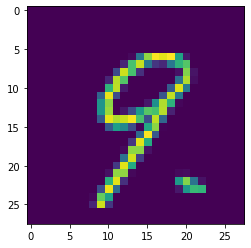

In [34]:
import matplotlib.pyplot as plt
#print(test[0].shape)
#test[0][:,:,0]
#plt.imshow(test[2][:,:,0])

In [35]:
results = pd.Series(results, name="Label")

In [36]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), results],axis = 1)

In [38]:
submission.to_csv('submission.csv', index=False)